In [1]:

import os
import imp
import matplotlib.pyplot as plt
import numpy as np
import math
import pandas as pd
import sys
import pickle
import importlib.util
import sympy as sp
from grp import struct_group
sys.path.append("/opt/lumerical/v221/api/python") #Default linux lumapi path
import lumapi
sys.path.append(os.path.dirname('/home/moises/Downloads/'))
#os.add_dll_directory('C:\\Program Files\\Lumerical\\v202\\api\\python\\')
#lumapi = imp.load_source('lumapi','C:\\Program Files\\Lumerical\\v202\\api\\python\\lumapi.py') 

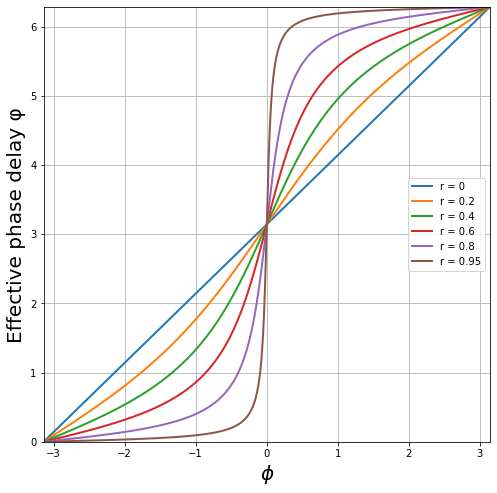

In [26]:

font = {'family' : 'serif',
        'weight' : 'normal',
        'size'   : 16}
figure1 = plt.figure(figsize=(8, 8))

a=1 #zero attenuation
phi = np.linspace(-np.pi,np.pi, 1000)
r = [0, 0.2, 0.4, 0.6, 0.8, 0.95]

for i in range(0,len(r)):

    phi_eff = np.pi + phi + np.arctan(r[i]*np.sin(phi)/(a-r[i]*np.cos(phi))) + np.arctan(r[i]*a*np.sin(phi)/(1-r[i]*a*np.cos(phi)))
    plt.plot(phi,phi_eff, label='r = '+str(r[i]), linewidth=2)
    plt.grid(True)
    plt.xlim([-np.pi,np.pi])
    plt.ylim([0, 2*np.pi])
    plt.ylabel('Effective phase delay '+ 'φ', size = '20')
    plt.xlabel('$\phi$', size = 20)
    plt.legend(loc='center right')

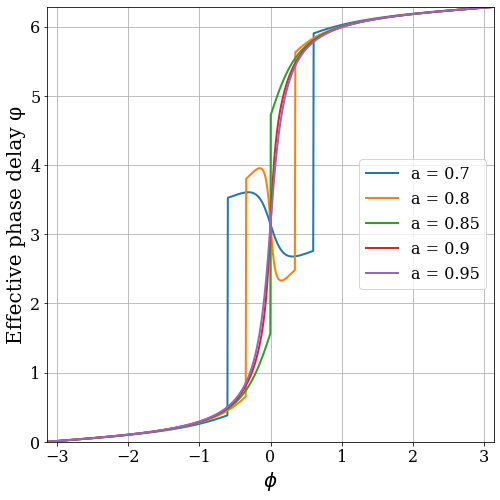

In [3]:
figure2 = plt.figure(figsize=(8, 8))
plt.rc('font', **font)
r = 0.85
a = [ 0.7, 0.8, 0.85, 0.9, 0.95]
phi = np.linspace(-np.pi,np.pi, 1000)

for i in range(0, len(a)):
    phi_eff = np.pi + phi + np.arctan(r*np.sin(phi)/(a[i]-r*np.cos(phi))) + np.arctan(r*a[i]*np.sin(phi)/(1-r*a[i]*np.cos(phi)))
    plt.plot(phi,phi_eff, label='a = '+str(a[i]), linewidth=2)
    plt.grid(True)
    plt.xlim([-np.pi,np.pi])
    plt.ylim([0, 2*np.pi])
    plt.ylabel('Effective phase delay '+ 'φ', size = '20')
    plt.xlabel('$\phi$', size = 20)
    plt.legend(loc='center right')

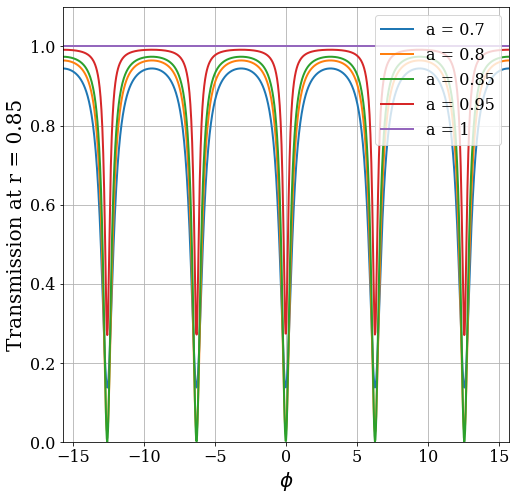

In [4]:
figure3 = plt.figure(figsize=(8, 8))
r = 0.85
a = [ 0.7,0.8,0.85, 0.95, 1]
phi = np.linspace(-5*np.pi,5*np.pi, 1000)
for i in range(0, len(a)):
    T = (a[i]**2 - 2*r*a[i]*np.cos(phi) + (r)**2)/(1 - 2*a[i]*r*np.cos(phi) + (r*a[i])**2)
    plt.plot(phi, T, label= 'a = ' + str(a[i]), linewidth = 2)
    plt.grid(True)
    plt.xlim([-5*np.pi,5*np.pi])
    plt.ylim([0, 1.1])
    plt.ylabel('Transmission at r = 0.85', size = '20')
    plt.xlabel('$\phi$', size = 20)
    plt.legend(loc='upper right')

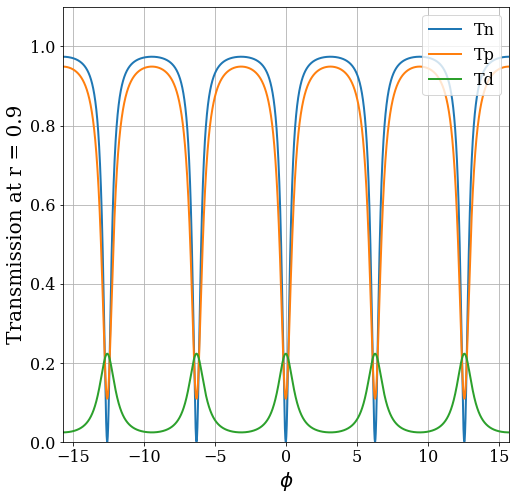

In [5]:
figure3 = plt.figure(figsize=(8, 8))
r1= 0.9
r2 = 0.9
r = 0.85

a = 0.85
phi = np.linspace(-5*np.pi,5*np.pi, 10000)

T_n = (a**2 - 2*r*a*np.cos(phi) + (r)**2)/(1 - 2*a*r*np.cos(phi) + (r*a)**2)
T_p = ((r*a)**2 - 2*r**2*a*np.cos(phi) + r**2)/(1 - 2*r**2*a*np.cos(phi)+(r**2*a)**2)
T_d = (1-r**2)*(1-r**2)*a/(1 - 2*r**2*a*np.cos(phi)+(r*a)**2)
plt.plot(phi, T_n, label= 'Tn', linewidth = 2)
plt.plot(phi, T_p, label= 'Tp', linewidth = 2)
plt.plot(phi, T_d, label= 'Td', linewidth = 2)
plt.grid(True)
plt.xlim([-5*np.pi,5*np.pi])
plt.ylim([0, 1.1])m
plt.ylabel('Transmission at r = 0.9', size = '20')
plt.xlabel('$\phi$', size = 20)
plt.legend(loc='upper right')

In [3]:
c = 299792458
lambd = 1550e-9 
ng = 4.622
FSR = 25.6*1e-9
FWHM = lambd**2*(100e9)/c
L = lambd**2/(ng*FSR)
Q = lambd/FWHM
radius = L/(2*np.pi)
delta_n = 1.98577 - 1.876785
T11 = np.sqrt(((ng*L*np.pi)/(2*Q*lambd))**2 + 1) - (ng*L*np.pi)/(2*Q*lambd)
T12 = np.sqrt(1-T11**2)
Lc = lambd/(np.pi*delta_n)*np.arcsin(T12)
print(radius)
print(Lc)
print(L)
print(Q)
print(FWHM)
print(FSR)

3.2315704002112728e-06
1.407798473103697e-06
2.0304555657723925e-05
1934.1448903225807
8.013877387135603e-10
2.5600000000000004e-08


In [4]:
b = (FWHM*np.pi*ng*L)**2/(lambd**4)
result_ = np.roots([1,-(2+b),1])
coeff = np.sqrt(result_)
print(result_)
10*np.log10(result_)

[1.10329977 0.90637198]


array([ 0.42693529, -0.42693529])

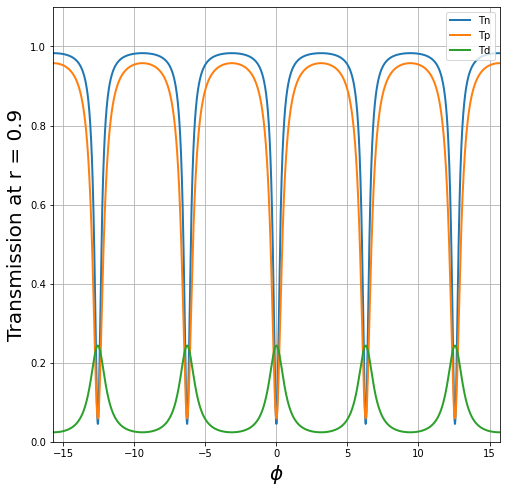

In [5]:
figure4 = plt.figure(figsize=(8, 8))
r1= 0.9
r2 = 0.9
r = 0.85

a = 0.9
phi = np.linspace(-5*np.pi,5*np.pi, 10000)

T_n = (a**2 - 2*r*a*np.cos(phi) + (r)**2)/(1 - 2*a*r*np.cos(phi) + (r*a)**2)
T_p = ((r*a)**2 - 2*r**2*a*np.cos(phi) + r**2)/(1 - 2*r**2*a*np.cos(phi)+(r**2*a)**2)
T_d = (1-r**2)*(1-r**2)*a/(1 - 2*r**2*a*np.cos(phi)+(r*a)**2)
plt.plot(phi, T_n, label= 'Tn', linewidth = 2)
plt.plot(phi, T_p, label= 'Tp', linewidth = 2)
plt.plot(phi, T_d, label= 'Td', linewidth = 2)
plt.grid(True)
plt.xlim([-5*np.pi,5*np.pi])
plt.ylim([0, 1.1])
plt.ylabel('Transmission at r = 0.9', size = '20')
plt.xlabel('$\phi$', size = 20)
plt.legend(loc='upper right')

In [2]:
fdtd =lumapi.FDTD(filename= 'halfring_straight.fsp')

In [7]:
def RectInsert(X,XSPAN,Y,YSPAN,Z,ZSPAN,MATERIAL,lumerical):
    lumerical.set("x",X)
    lumerical.set("x span",XSPAN)
    lumerical.set("y",Y)
    lumerical.set("y span",YSPAN)
    lumerical.set("z",Z)
    lumerical.set("z span", ZSPAN)
    lumerical.set("material",MATERIAL)
    



In [63]:
fdtd.switchtolayout()
fdtd.selectall()
fdtd.delete()

radius = 3e-6
gap = 0.17e-6
Lc = 0e-6
len = 30e-6
width = 0.4e-6
height = 0.18e-6

fdtd.addobject("ring_resonator")
fdtd.setnamed("ring resonator::outer_bottom",'enabled',0)
fdtd.setnamed("ring resonator::inner_bottom",'enabled',0)
fdtd.setnamed("ring resonator::arc2",'enabled',0)
fdtd.setnamed("ring resonator::arc3",'enabled',0)

fdtd.select("ring resonator")
fdtd.set({"x":0,
"y":0,
"z":0,
"Lc":Lc,
"gap":gap,
"radius":radius,
"base width":width,
"base height":height,
"x span":len,
"material":"Si (Silicon) - Palik Copy 1"})

In [64]:
fdtd.switchtolayout()
fdtd.select("rect_right")
fdtd.delete()
fdtd.select("rect_left")
fdtd.delete()

x_right_rect = (len/2 + Lc/2 + radius)
x_right_rect_span = width
y_right_rect_span = 2e-6
y_right_rect = -y_right_rect_span/2

x_left_rect = len/2 - Lc/2 - radius
x_left_rect_span = width
y_left_rect_span = 2e-6
y_left_rect = -y_left_rect_span/2

fdtd.addrect()
fdtd.set({"x":x_right_rect,
"x span":x_right_rect_span,
"y":y_right_rect,
"y span":y_right_rect_span,
"z":0,
"z span":height,
"material":"Si (Silicon) - Palik Copy 1",
"name":"rect_right"})

fdtd.addrect()
fdtd.set({"x":x_left_rect,
"x span":x_left_rect_span,
"y":y_left_rect,
"y span":y_left_rect_span,
"z":0,
"z span":height,
"material":"Si (Silicon) - Palik Copy 1",
"name":"rect_left"})


In [65]:
fdtd.switchtolayout()
fdtd.select("FDTD")
fdtd.delete()
fdtd.select("monitor")
fdtd.delete()

fdtd.addfdtd()
fdtd.set({"x":len/2,
"x span":Lc + 2*radius + 4e-6,
"y min":-y_right_rect_span/2 -0.3e-6,
"y max":radius + width + gap + 3e-6,
"z":0,
"z span":3e-6,
"z min bc":"Symmetric",
"background material":"SiO2 (Glass) - Palik Copy 1",n
"mesh accuracy":4,
"dt stability factor":0.95,
"simulation time":1000e-15
})

fdtd.addprofile()
fdtd.setnamed("monitor","x",len/2)
fdtd.setnamed("monitor","x span",Lc + 2*radius + 4e-6)
fdtd.setnamed("monitor","y min",-y_right_rect_span/2 -0.75e-6)
fdtd.setnamed("monitor","y max",radius + width + gap + 3e-6)

fdtd.addport()
fdtd.set({"x":len/2 - Lc/2 - radius - 1e-6,
"y":radius + gap + width,
"y span":4e-6,
"z":0,
"z span":3e-6})

fdtd.addport()
fdtd.set({"x":len/2 + Lc/2 + radius + 1e-6,
"y":radius + gap + width,
"y span":4e-6,
"z":0,
"z span":3e-6,
"direction":"Backward"})

fdtd.addport()
fdtd.set({"x":x_left_rect,
"y":y_left_rect + 0.3e-6,
"x span":4e-6,
"z":0,
"z span":3e-6,
"injection axis":"y-axis",
"direction":"Forward"})

fdtd.addport()
fdtd.set({"x":x_right_rect,
"y":y_right_rect + 0.3e-6,
"x span":4e-6,
"z":0,
"z span":3e-6,
"injection axis":"y-axis",
"direction":"Forward"})

fdtd.select("FDTD::ports")
fdtd.set({"monitor frequency points":25})
fdtd.setglobalsource("wavelength start",1.5e-6)
fdtd.setglobalsource("wavelength stop", 1.6e-6)

#fdtd.run()

1.0

In [23]:
number_of_points = 3
lc = np.linspace(0,2e-6,number_of_points)

fdtd.addsweep()
fdtd.setsweep("sweep", "name", "lc_sweep")
fdtd.setsweep("lc_sweep", "type", "values")
fdtd.setsweep("lc_sweep", "number of points", number_of_points)

1.0

In [22]:
fdtd.setnamed("FDTD::ports::port 3","enabled",0)
fdtd.setnamed("FDTD::ports::port 4","enabled",0)

para = {"Name":"Lc",
"Parameter":"::model::ring resonator::Lc",
"Type":"Length"}

for k in range(number_of_points):
    para.update({"value_" + str(k+1):lc[k]})

fdtd.addsweepparameter("lc_sweep", para)

Result = {"Name":"T",
"Result":"::model::FDTD::ports::port 2::T"}

fdtd.addsweepresult("lc_sweep", Result)

NameError: name 'number_of_points' is not defined

In [82]:
x_right = len/2 + lc/2 + radius
x_left = len/2 -lc/2 - radius
x_span_fdtd = lc + 2*radius + 4e-6
x_port1 = len/2 - lc/2 - radius - 1e-6
x_port2 = len/2 + lc/2 + radius + 1e-6

para_xr = {"Name":"xr",
"Parameter":"::model::rect_right::x",
"Type":"Length"}

para_xl = {"Name":"xl",
"Parameter":"::model::rect_left::x",
"Type":"Length"}

para_xspan_fdtd = {"Name":"x_span_fdtd",
"Parameter":"::model::FDTD::x span",
"Type":"Length"}

para_xport1 = {"Name":"x_port1",
"Parameter":"::model::FDTD::ports::port 1::x",
"Type":"Length"}

para_xport2 = {"Name":"x_port2",
"Parameter":"::model::FDTD::ports::port 2::x",
"Type":"Length"}

for k in range(number_of_points):
    para_xr.update({"value_" + str(k+1):x_right[k]})
    para_xl.update({"value_" + str(k+1):x_left[k]})
    para_xspan_fdtd.update({"value_" + str(k+1):x_span_fdtd[k]})
    para_xport1.update({"value_" + str(k+1):x_port1[k]})
    para_xport2.update({"value_" + str(k+1):x_port2[k]})
    
fdtd.addsweepparameter("lc_sweep", para_xr)
fdtd.addsweepparameter("lc_sweep", para_xl)
fdtd.addsweepparameter("lc_sweep", para_xspan_fdtd)
fdtd.addsweepparameter("lc_sweep", para_xport1)
fdtd.addsweepparameter("lc_sweep", para_xport2)

'x_port2'

In [21]:
fdtd.runsweep("lc_sweep")
T = fdtd.getsweepresult("lc_sweep", "T")

LumApiError: "The optimization or parameter sweep object 'lc_sweep' cannot be found."

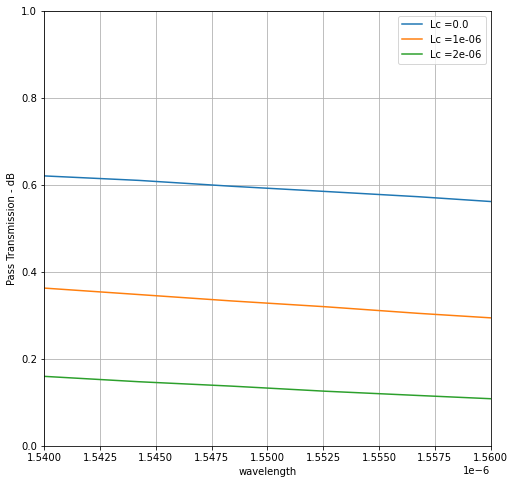

In [88]:
figure5 = plt.figure(figsize=(8, 8))

LC = T['Lc']
wavelength = T['lambda']
a = T['T']

for i in range (0,number_of_points):
    plt.plot(wavelength,((a[:,i])**2), label = "Lc =" + str(str(LC[0,i])))
    plt.grid(True)
    plt.xlabel("wavelength")
    plt.ylabel("Pass Transmission - dB")
    plt.legend(loc = "upper right")
    plt.ylim([0, 1])
    plt.xlim([1.54e-6,1.56e-6])
    

In [53]:
number_of_points_gap = 4
gap_s = np.linspace(0.1665e-6,0.17e-6,number_of_points_gap)

fdtd.addsweep()
fdtd.setsweep("sweep", "name", "gap_sweep")
fdtd.setsweep("gap_sweep", "type", "values")
fdtd.setsweep("gap_sweep", "number of points", number_of_points_gap)

1.0

In [54]:
#fdtd.setnamed("FDTD::ports::port 3","enabled",0)
#fdtd.setnamed("FDTD::ports::port 4","enabled",0)

LC = 0
y_port1 = radius + gap_s + 0.4e-6
y_port2 = radius + gap_s + 0.4e-6
y_max_fdtd = radius + gap_s + 0.4e-6 + 3e-6

para_gap = {"Name":"gap",
"Parameter":"::model::ring resonator::gap",
"Type":"Length"}
n
para_y_port1 = {"Name":"y_port1",
"Parameter":"::model::FDTD::ports::port 1::y",
"Type":"Length"}

para_y_port2 = {"Name":"y_port2",
"Parameter":"::model::FDTD::ports::port 2::y",
"Type":"Length"}

para_y_max_fdtd = {"Name":"y_max_fdtd",
"Parameter":"::model::FDTD::y max",
"Type":"Length"}

for k in range(number_of_points_gap):
    para_gap.update({"value_" + str(k+1):gap_s[k]})
    para_y_port1.update({"value_" + str(k+1):y_port1[k]})
    para_y_port2.update({"value_" + str(k+1):y_port2[k]})
    para_y_max_fdtd.update({"value_" + str(k+1):y_max_fdtd[k]})

fdtd.addsweepparameter("gap_sweep", para_gap)
fdtd.addsweepparameter("gap_sweep", para_y_port1)
fdtd.addsweepparameter("gap_sweep", para_y_port2)
fdtd.addsweepparameter("gap_sweep", para_y_max_fdtd)

Result_gap = {"Name":"T",
"Result":"::model::FDTD::ports::port 2::T"}

fdtd.addsweepresult("gap_sweep", Result_gap)

fdtd.runsweep("gap_sweep")
T = fdtd.getsweepresult("gap_sweep", "T")

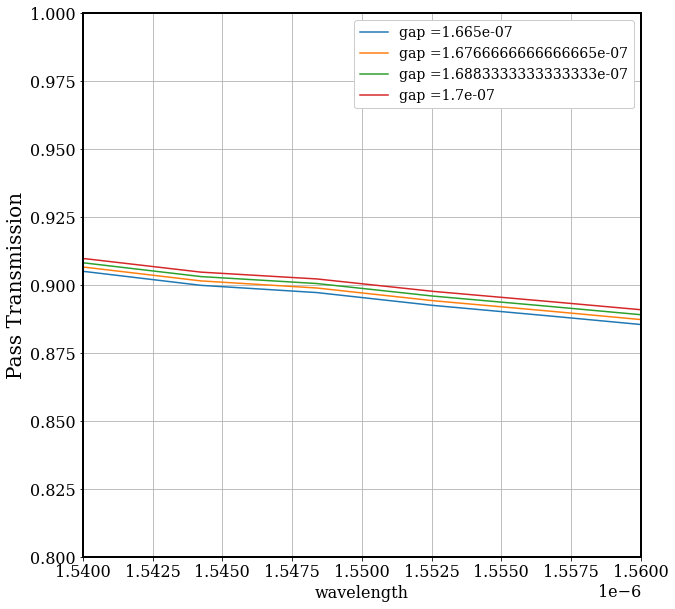

In [27]:
figure6 = plt.figure(figsize=(10, 10))
gap = T['gap']
wavelength = T['lambda']
a = T['T']

for i in range (0,4):
    plt.rc('font', **font)
    plt.rc('axes', linewidth=2)
    plt.plot(wavelength,((a[:,i])), label = "gap =" + str(str(gap[0,i])))
    plt.grid(True)
    plt.xlabel("wavelength")
    plt.ylabel("Pass Transmission", size = '20')
    plt.legend(loc = "upper right", framealpha = 1, fontsize = '14')
    plt.ylim([0.8, 1])
    plt.xlim([1.54e-6,1.56e-6])

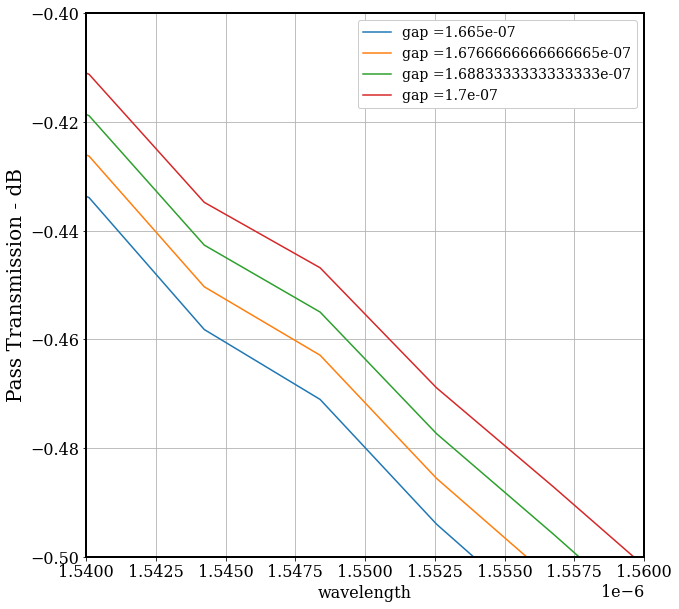

In [30]:
figure = plt.figure(figsize=(10, 10))
gap = T['gap']
wavelength = T['lambda']
a = T['T']

for i in range (0,4):
    plt.rc('font', **font)
    plt.rc('axes', linewidth=2)
    plt.plot(wavelength,10*np.log10((a[:,i])), label = "gap =" + str(str(gap[0,i])))
    plt.grid(True)
    plt.xlabel("wavelength")
    plt.ylabel("Pass Transmission - dB", size = '20')
    plt.legend(loc = "upper right", framealpha = 1, fontsize = '14')
    plt.ylim([-0.5, -0.4])
    plt.xlim([1.54e-6,1.56e-6])

In [46]:
gap_points = [150e-9, 175e-9, 200e-9]
Lc_points = [0, 2000e-9, 4000e-9]

x_right = len/2 + Lc_points/2 + radius
x_left = len/2 -Lc_points/2 - radius
x_span_fdtd = Lc_points + 2*radius + 4e-6
x_left = len/2 -Lc_points/2 - radius
x_span_fdtd = Lc_points + 2*radius + 4e-6
x_port1 = len/2 - Lc_points/2 - radius - 1e-6
x_port2 = len/2 + Lc_points/2 + radius + 1e-6

y_port1 = radius + gap_points + width
y_port2 = radius + gap_points+ width
y_max_fdtd = radius + gap_points + width + 3e-6

fdtd.switchtolayout()

for i in range(len(Lc_points)):
    for j in range(len(gap_points)):
        fdtd.switchtolayout()

        fdtd.setnamed("ring resoantor","Lc",Lc_points[i])
        fdtd.setnamed("rect_right","x",x_right[i])
        fdtd.setnamed("rect_left","x",x_left[i])
        fdtd.setnamed("FDTD::ports::port 1","x",x_port1[i])
        fdtd.setnamed("FDTD::ports::port 1","x",x_port2[i])
        fdtd.setnamed("FDTD","x span",x_span_fdtd[i])

        fdtd.setnamed("FDTD::ports::port 1","y",y_port1[j])
        fdtd.setnamed("FDTD::ports::port 2","y",y_port2[j])
        fdtd.setnamed("FDTD","y max",y_max_fdtd[j])   

TypeError: unsupported operand type(s) for /: 'builtin_function_or_method' and 'int'

In [42]:
inter_1 =lumapi.INTERCONNECT(filename= 'chip.icp')

In [35]:
inter_1.switchtolayout()
inter_1.setnamed('ONA_1','number of points', 100e3)
inter_1.run()

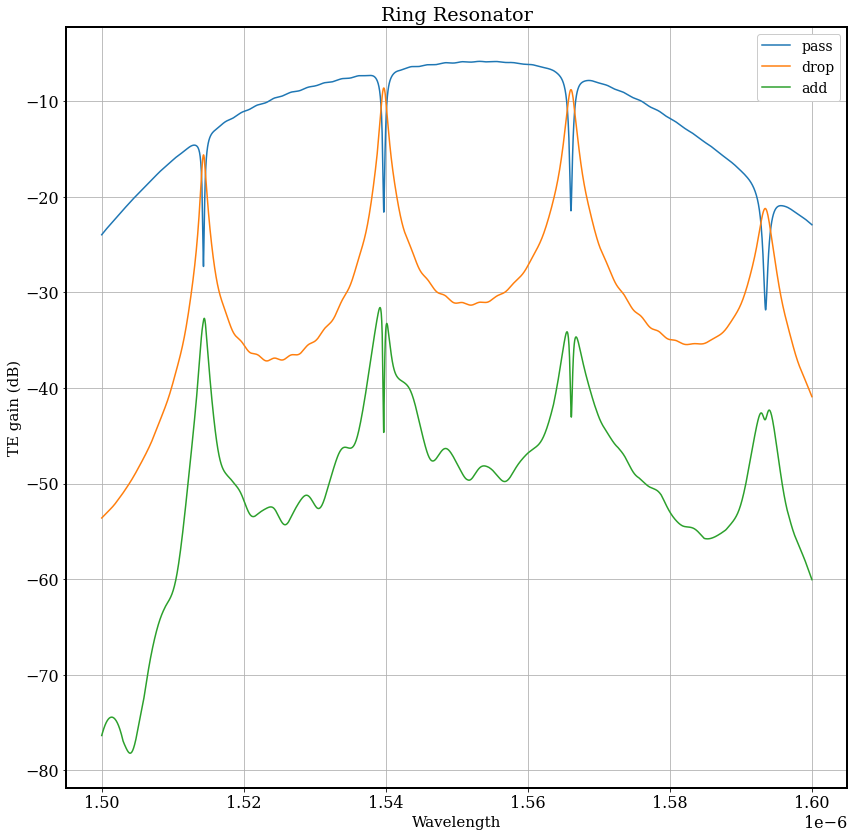

In [36]:
Resultado1 = inter_1.getresult('ONA_1','input 1/mode 1/gain')
Resultado2 = inter_1.getresult('ONA_1','input 2/mode 1/gain')
Resultado3 = inter_1.getresult('ONA_1','input 3/mode 1/gain')

wavelength = Resultado1['wavelength']
gain_1 = Resultado1['TE gain (dB)']
gain_2 = Resultado2['TE gain (dB)']
gain_3 = Resultado3['TE gain (dB)']

figure = plt.figure(figsize=(14, 14))
plt.plot(wavelength, gain_1, label = 'pass')
plt.plot(wavelength, gain_2,label = 'drop')
plt.plot(wavelength, gain_3,label = 'add')
plt.grid(True)
plt.xlabel('Wavelength',size = 15)
plt.ylabel('TE gain (dB)',size = 15)
plt.title('Ring Resonator')
plt.legend(loc = 'upper right',framealpha = 1, fontsize = 14)

In [37]:
inter_2 =lumapi.INTERCONNECT(filename= 'ref_1.icp')


In [38]:
inter_2.switchtolayout()
inter_2.setnamed('ONA_1','number of points', 100e3)
inter_2.run()

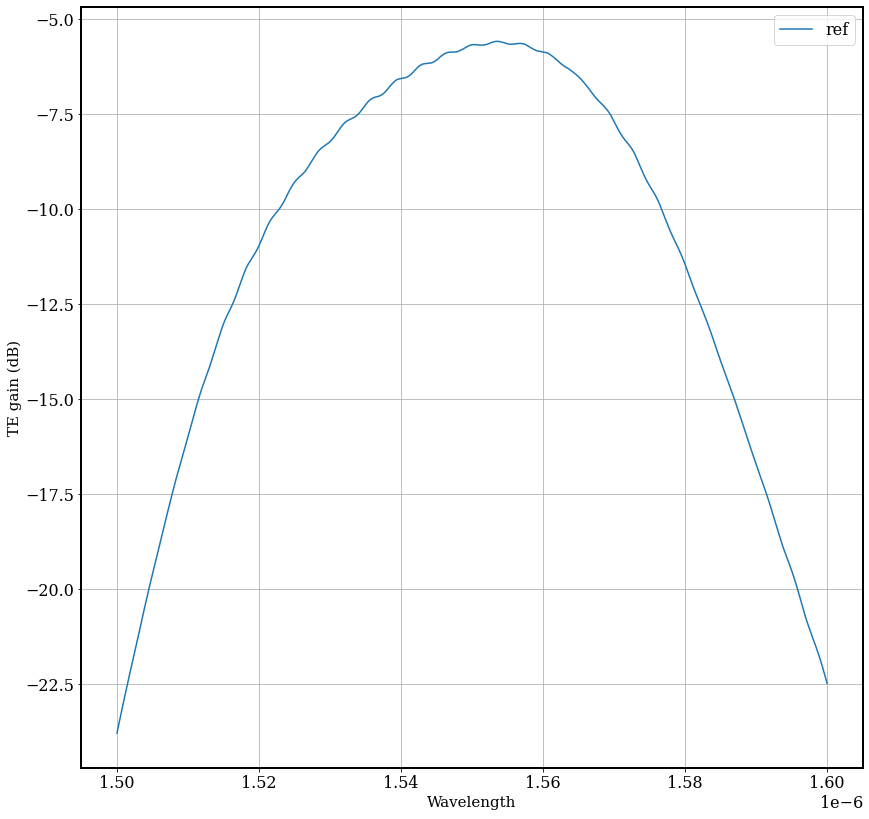

In [39]:
result_referencia = inter_2.getresult('ONA_1','input 1/mode 1/gain')
gain_ref = result_referencia['TE gain (dB)']

figure = plt.figure(figsize=(14, 14))
plt.plot(wavelength, gain_ref,label = 'ref')
plt.xlabel('Wavelength',size = 15)
plt.ylabel('TE gain (dB)',size = 15)
plt.grid(True)
plt.legend(loc = 'upper right')

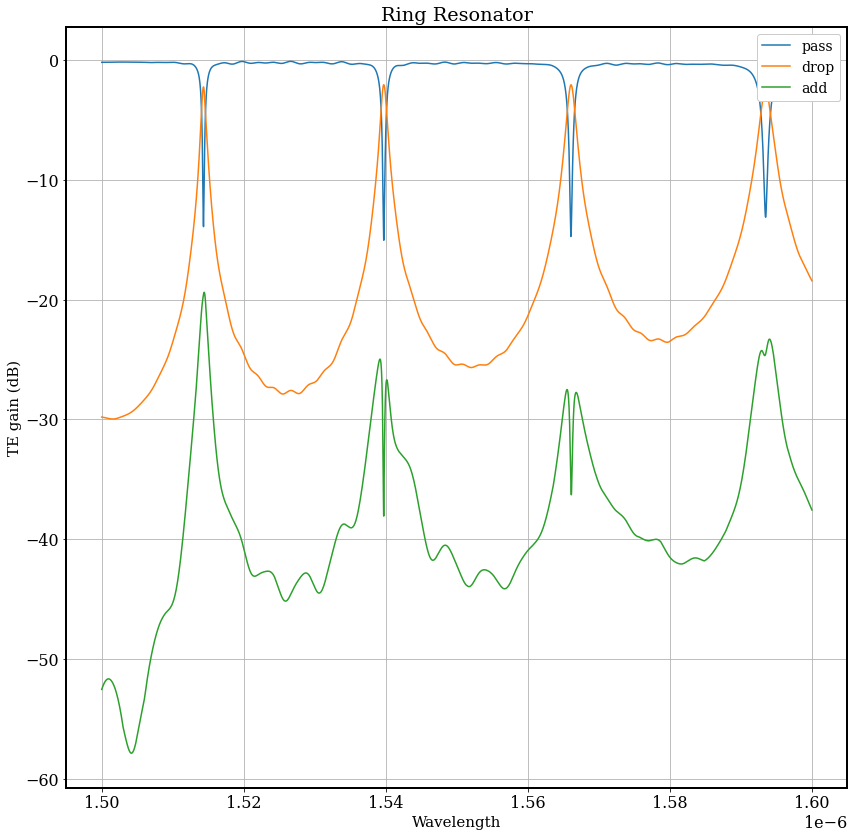

In [40]:
figure = plt.figure(figsize=(14, 14))
plt.plot(wavelength, gain_1 - gain_ref, label = 'pass')
plt.plot(wavelength, gain_2 - gain_ref,label = 'drop')
plt.plot(wavelength, gain_3 - gain_ref,label = 'add')
plt.grid(True)
plt.xlabel('Wavelength',size = 15)
plt.ylabel('TE gain (dB)',size = 15)
plt.title('Ring Resonator')
plt.legend(loc = 'upper right',framealpha = 1, fontsize = 14)

In [43]:
inter_3 = lumapi.INTERCONNECT(filename= 'ref_2.icp')

In [44]:
inter_3.switchtolayout()
inter_3.setnamed('ONA_1','number of points', 100e3)
inter_3.run()
result_ref_cascata = inter_3.getresult('ONA_1','input 1/mode 1/gain')

In [45]:
ref_cascata = result_ref_cascata['TE gain (dB)']

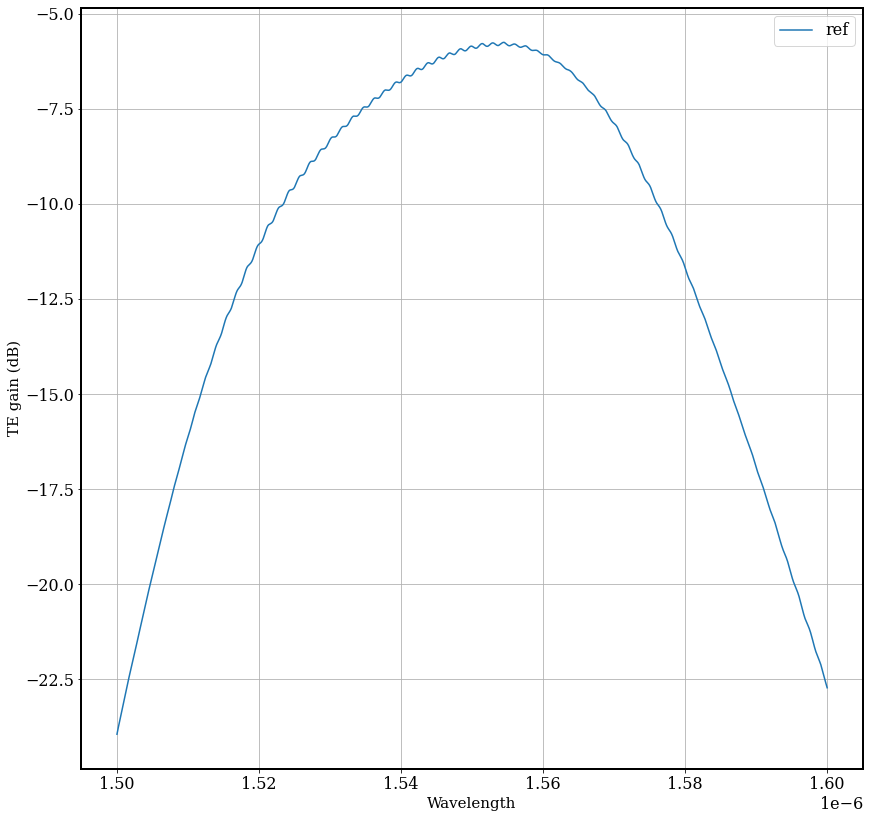

In [47]:
figure = plt.figure(figsize=(14, 14))
plt.plot(wavelength, ref_cascata,label = 'ref')
plt.xlabel('Wavelength',size = 15)
plt.ylabel('TE gain (dB)',size = 15)
plt.grid(True)
plt.legend(loc = 'upper right')

In [49]:
inter_4 = lumapi.INTERCONNECT(filename= 'chip_klayout_pass_2.icp')

In [50]:
inter_4.switchtolayout()
inter_4.setnamed('ONA_1','number of points', 100e3)
inter_4.run()
result_pass_2 = inter_4.getresult('ONA_1','input 1/mode 1/gain')

In [51]:
pass_2 = result_pass_2['TE gain (dB)']

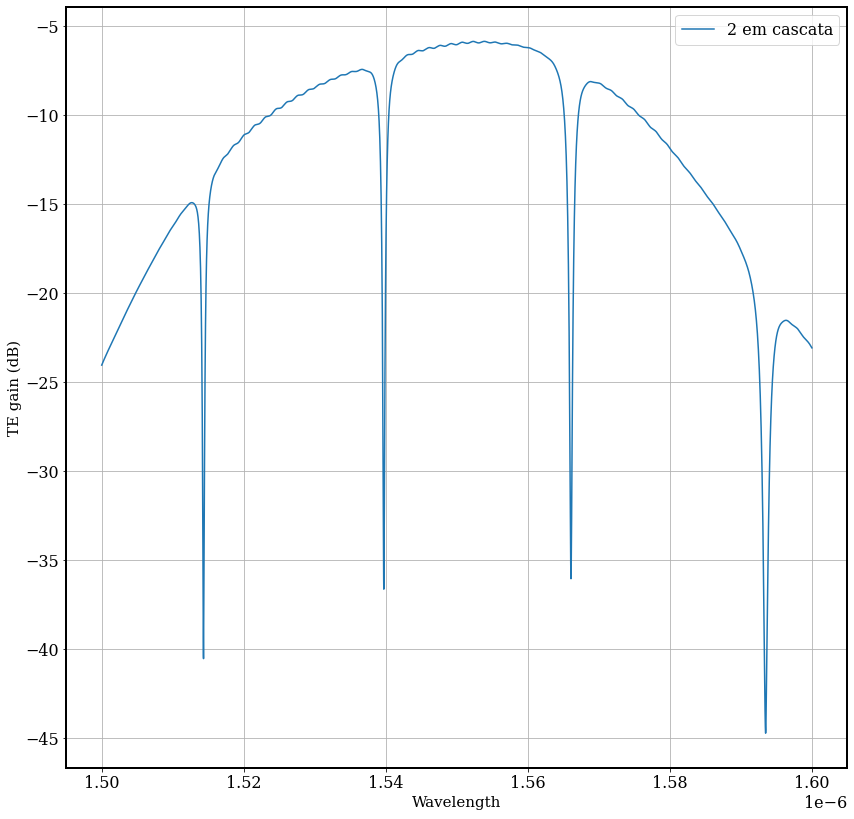

In [55]:
figure = plt.figure(figsize=(14, 14))
plt.plot(wavelength, pass_2,label = '2 em cascata')
plt.xlabel('Wavelength',size = 15)
plt.ylabel('TE gain (dB)',size = 15)
plt.grid(True)
plt.legend(loc = 'upper right')

In [56]:
inter_5 = lumapi.INTERCONNECT(filename= 'chip_klayout_pass_3.icp')

In [57]:
inter_5.switchtolayout()
inter_5.setnamed('ONA_1','number of points', 100e3)
inter_5.run()
result_pass_3 = inter_5.getresult('ONA_1','input 1/mode 1/gain')

In [58]:
pass_3 = result_pass_3['TE gain (dB)']

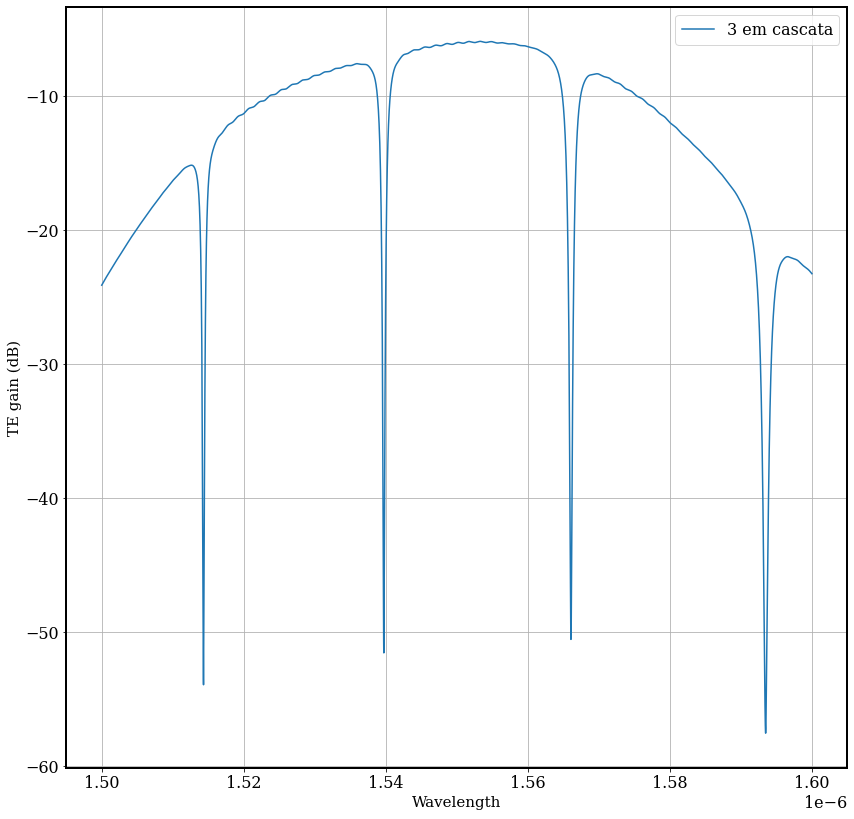

In [59]:
figure = plt.figure(figsize=(14, 14))
plt.plot(wavelength, pass_3,label = '3 em cascata')
plt.xlabel('Wavelength',size = 15)
plt.ylabel('TE gain (dB)',size = 15)
plt.grid(True)
plt.legend(loc = 'upper right')

In [60]:
inter_6 = lumapi.INTERCONNECT(filename= 'chip_klayout_pass_4.icp')

In [61]:
inter_6.switchtolayout()
inter_6.setnamed('ONA_1','number of points', 100e3)
inter_6.run()
result_pass_4 = inter_6.getresult('ONA_1','input 1/mode 1/gain')

In [62]:
pass_4 = result_pass_4['TE gain (dB)']
wavelength = result_pass_4['wavelength']

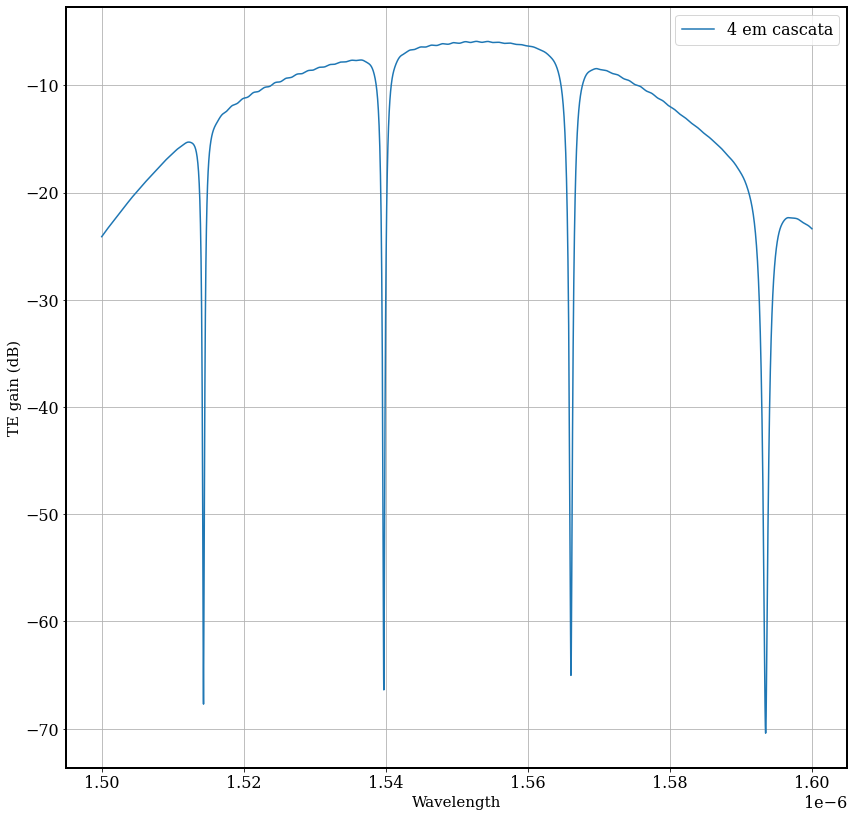

In [63]:
figure = plt.figure(figsize=(14, 14))
plt.plot(wavelength, pass_4,label = '4 em cascata')
plt.xlabel('Wavelength',size = 15)
plt.ylabel('TE gain (dB)',size = 15)
plt.grid(True)
plt.legend(loc = 'upper right')

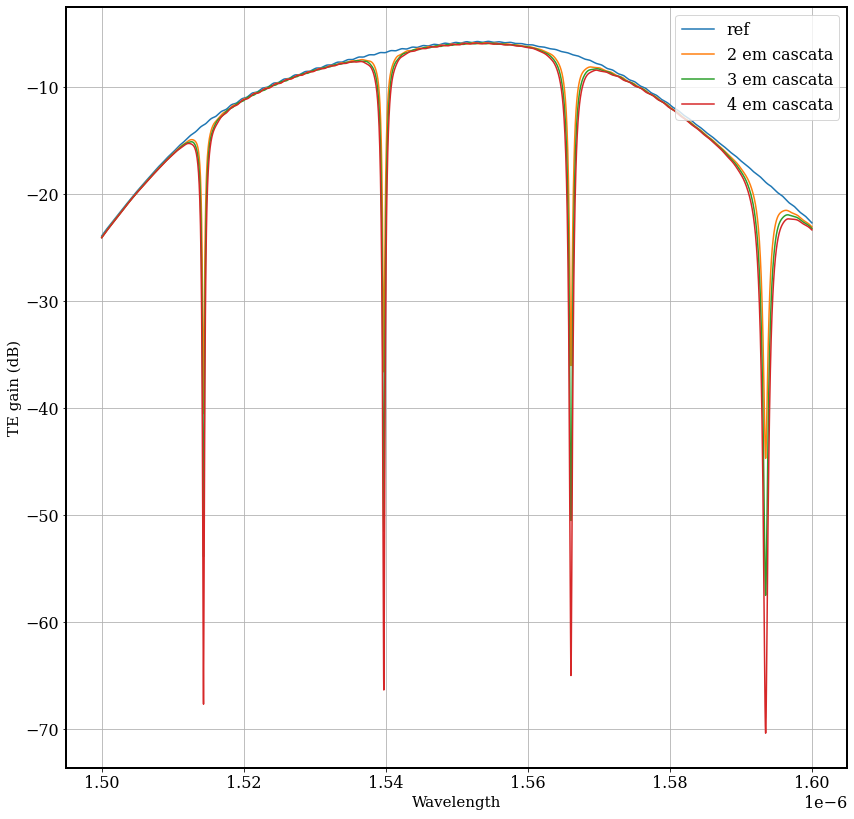

In [67]:
figure = plt.figure(figsize=(14, 14))
plt.plot(wavelength, ref_cascata,label = 'ref')
plt.plot(wavelength, pass_2,label = '2 em cascata')
plt.plot(wavelength, pass_3, label = '3 em cascata')
plt.plot(wavelength, pass_4, label = '4 em cascata')
plt.xlabel('Wavelength',size = 15)
plt.ylabel('TE gain (dB)',size = 15)
#plt.ylim([-50, 0])
#plt.xlim([1.53e-6,1.55e-6])
plt.grid(True)
plt.legend(loc = 'upper right')

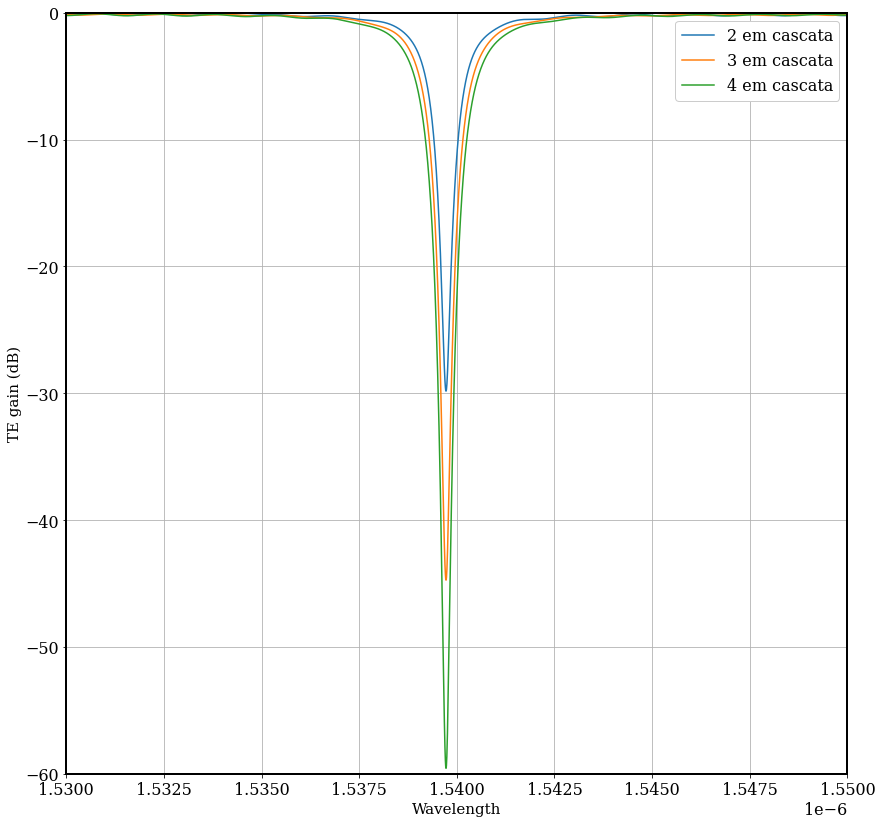

In [66]:
figure = plt.figure(figsize=(14, 14))
#plt.plot(wavelength, ref_cascata,label = 'ref')
plt.plot(wavelength, pass_2 - ref_cascata,label = '2 em cascata')
plt.plot(wavelength, pass_3 - ref_cascata, label = '3 em cascata')
plt.plot(wavelength, pass_4 - ref_cascata, label = '4 em cascata')
plt.xlabel('Wavelength',size = 15)
plt.ylabel('TE gain (dB)',size = 15)
plt.ylim([-60, 0])
plt.xlim([1.53e-6,1.55e-6])
plt.grid(True)
plt.legend(loc = 'upper right',framealpha = 1)

In [68]:
inter_7 = lumapi.INTERCONNECT(filename= 'ref_dropp.icp')

In [69]:
inter_7.switchtolayout()
inter_7.setnamed('ONA_1','number of points', 100e3)
inter_7.run()
result_ref_dropp = inter_7.getresult('ONA_1','input 1/mode 1/gain')

In [71]:
ref_dropp = result_ref_dropp['TE gain (dB)']
wavelength = result_ref_dropp['wavelength']

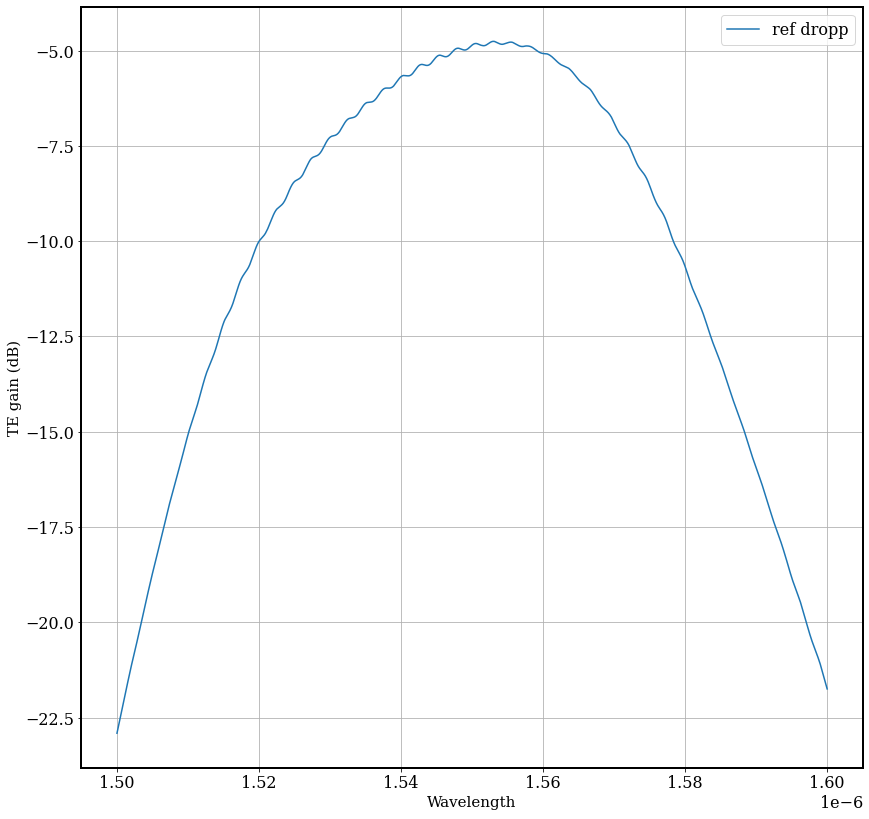

In [73]:
figure = plt.figure(figsize=(14, 14))
plt.plot(wavelength, ref_dropp,label = 'ref dropp')
plt.xlabel('Wavelength',size = 15)
plt.ylabel('TE gain (dB)',size = 15)
plt.grid(True)
plt.legend(loc = 'upper right')

In [74]:
inter_8 = lumapi.INTERCONNECT(filename= 'chip_klayout_dropp_2.icp')

In [75]:
inter_8.switchtolayout()
inter_8.setnamed('ONA_1','number of points', 100e3)
inter_8.run()
result_dropp_2 = inter_8.getresult('ONA_1','input 1/mode 1/gain')

In [76]:
dropp_2 = result_dropp_2['TE gain (dB)']
wavelength = result_ref_dropp['wavelength']

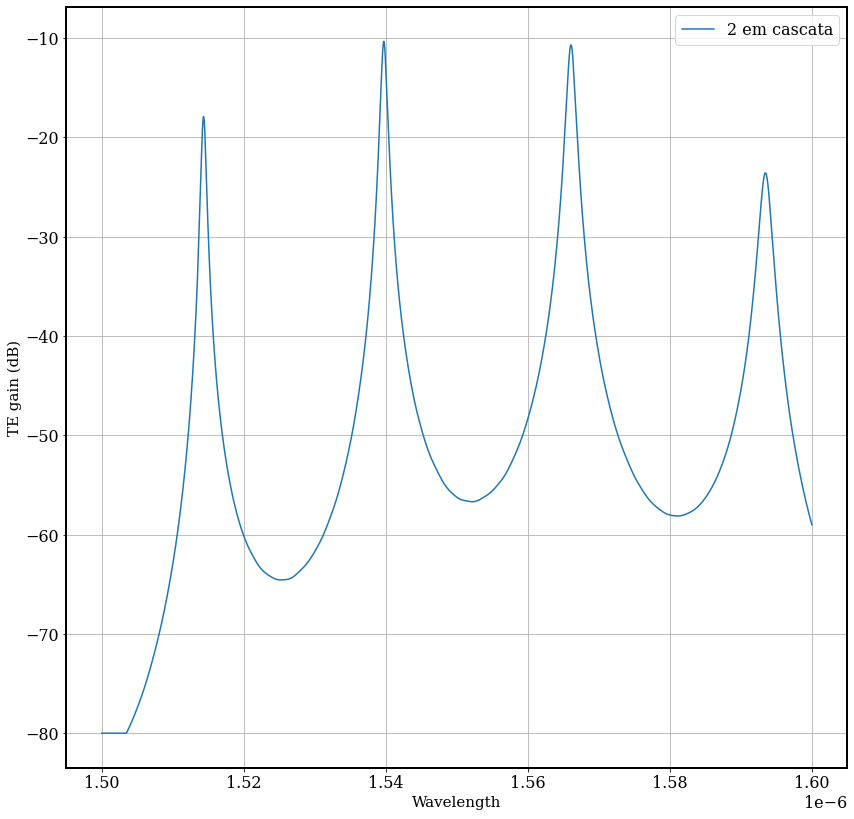

In [77]:
figure = plt.figure(figsize=(14, 14))
plt.plot(wavelength, dropp_2,label = '2 em cascata')
plt.xlabel('Wavelength',size = 15)
plt.ylabel('TE gain (dB)',size = 15)
plt.grid(True)
plt.legend(loc = 'upper right')

In [79]:
figure = plt.figure(figsize=(14, 14))
plt.plot(wavelength, ref_cascata,label = 'ref')
plt.plot(wavelength, pass_2,label = '2 em cascata')
plt.plot(wavelength, pass_3, label = '3 em cascata')
plt.plot(wavelength, pass_4, label = '4 em cascata')
plt.xlabel('Wavelength',size = 15)
plt.ylabel('TE gain (dB)',size = 15)
#plt.ylim([-50, 0])
#plt.xlim([1.53e-6,1.55e-6])
plt.grid(True)
plt.legend(loc = 'upper right')

In [80]:
inter_9.switchtolayout()
inter_9.setnamed('ONA_1','number of points', 100e3)
inter_9.run()
result_dropp_3 = inter_9.getresult('ONA_1','input 1/mode 1/gain')

In [81]:
dropp_3 = result_dropp_3['TE gain (dB)']
wavelength = result_ref_dropp['wavelength']

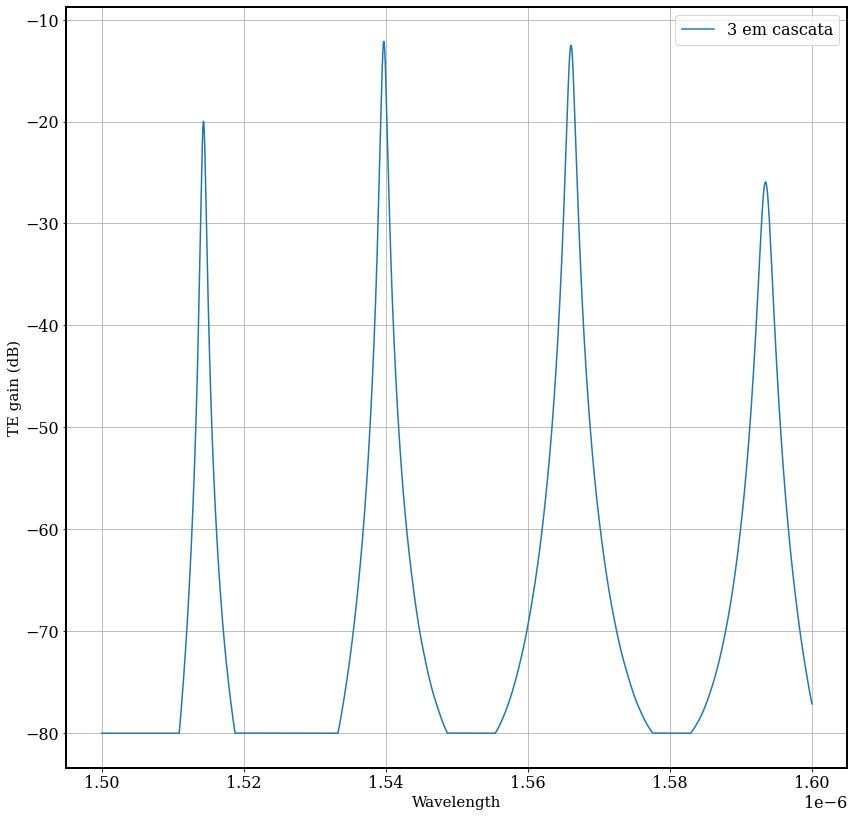

In [82]:
figure = plt.figure(figsize=(14, 14))
plt.plot(wavelength, dropp_3,label = '3 em cascata')
plt.xlabel('Wavelength',size = 15)
plt.ylabel('TE gain (dB)',size = 15)
plt.grid(True)
plt.legend(loc = 'upper right')

In [85]:
inter_10 = lumapi.INTERCONNECT(filename= 'chip_klayout_dropp_4.icp')

In [86]:
inter_10.switchtolayout()
inter_10.setnamed('ONA_1','number of points', 100e3)
inter_10.run()
result_dropp_4= inter_10.getresult('ONA_1','input 1/mode 1/gain')

In [94]:
dropp_4 = result_dropp_4['TE gain (dB)']
wavelength = result_ref_dropp['wavelength']

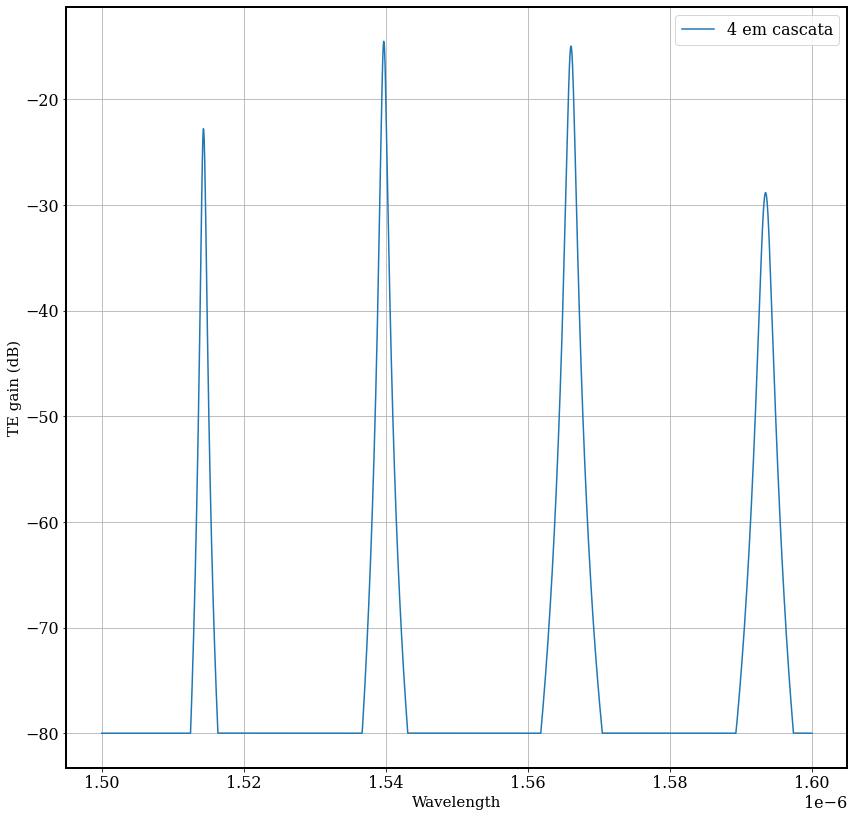

In [95]:
figure = plt.figure(figsize=(14, 14))
plt.plot(wavelength, dropp_4,label = '4 em cascata')
plt.xlabel('Wavelength',size = 15)
plt.ylabel('TE gain (dB)',size = 15)
plt.grid(True)
plt.legend(loc = 'upper right')

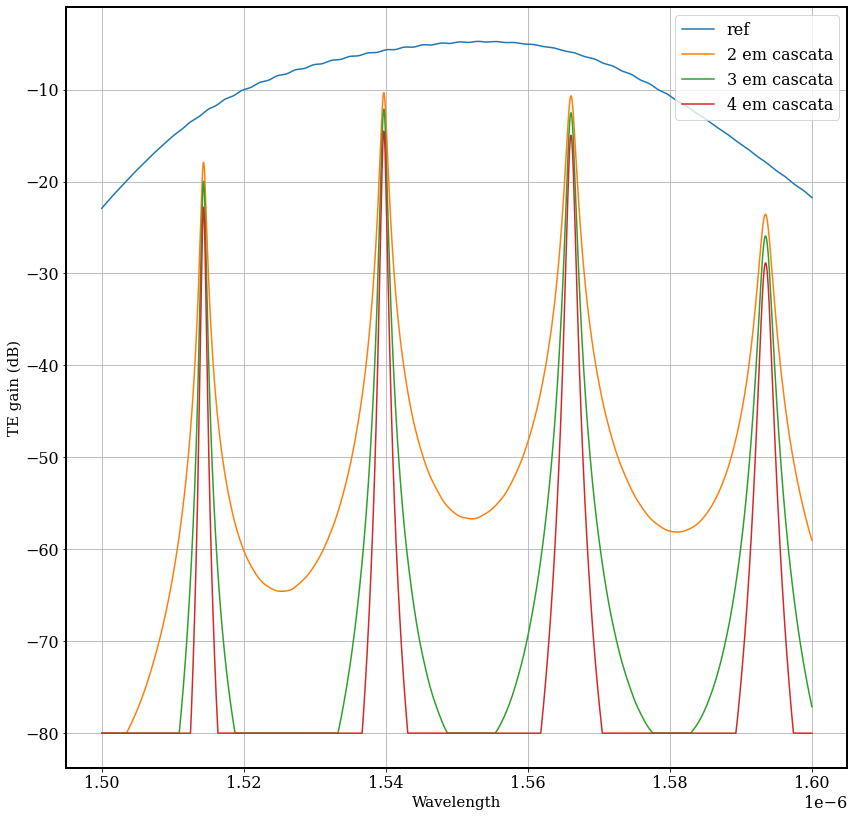

In [96]:
figure = plt.figure(figsize=(14, 14))
plt.plot(wavelength, ref_dropp,label = 'ref')
plt.plot(wavelength, dropp_2,label = '2 em cascata')
plt.plot(wavelength, dropp_3, label = '3 em cascata')
plt.plot(wavelength, dropp_4, label = '4 em cascata')
plt.xlabel('Wavelength',size = 15)
plt.ylabel('TE gain (dB)',size = 15)
#plt.ylim([-50, 0])
#plt.xlim([1.53e-6,1.55e-6])
plt.grid(True)
plt.legend(loc = 'upper right')

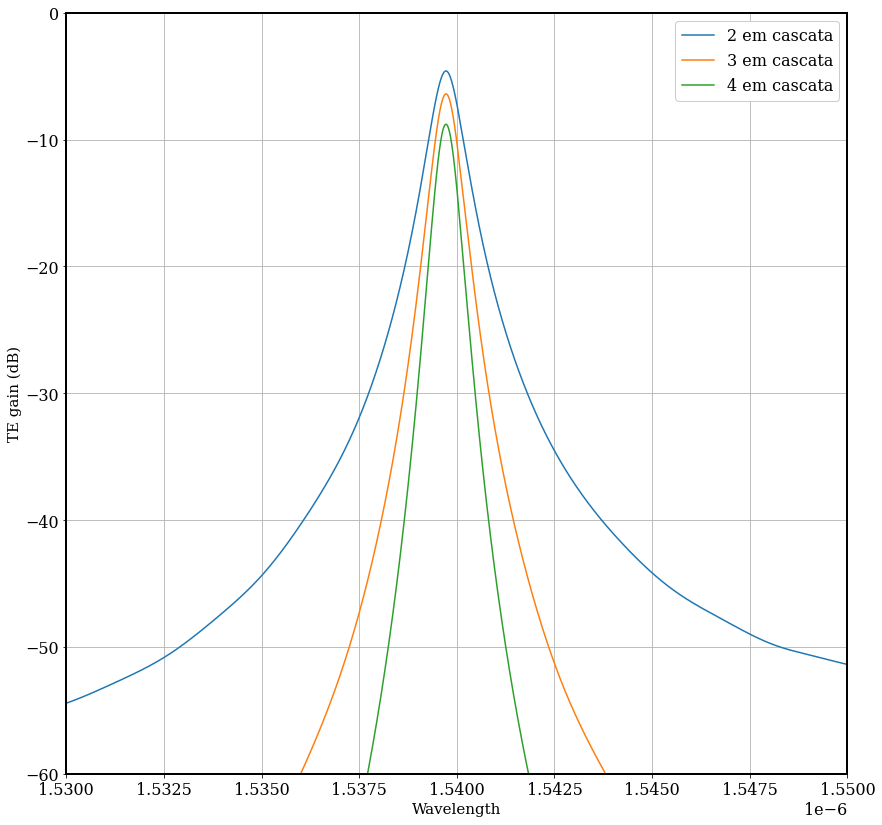

In [98]:
figure = plt.figure(figsize=(14, 14))
#plt.plot(wavelength, ref_cascata,label = 'ref')
plt.plot(wavelength, dropp_2 - ref_dropp,label = '2 em cascata')
plt.plot(wavelength, dropp_3 - ref_dropp, label = '3 em cascata')
plt.plot(wavelength, dropp_4 - ref_dropp, label = '4 em cascata')
plt.xlabel('Wavelength',size = 15)
plt.ylabel('TE gain (dB)',size = 15)
plt.ylim([-60, 0])
plt.xlim([1.53e-6,1.55e-6])
plt.grid(True)
plt.legend(loc = 'upper right',framealpha = 1)